## Base de datos 
Esta es una base de datos extraida de https://www.kaggle.com/datasets/bravehart101/sample-supermarket-dataset. En ella se exponen los datos de un hipermercado en varios años.

### Librerias necesarias para el analisis

In [2]:
import pandas as pd
import numpy as np
import time
import matplotlib
import datetime
from datetime import datetime
import matplotlib.pyplot as plt

### Función auxiliar para graficar

In [3]:
def plot_easy_v2(c,df,df1,world,world1,world2):
    m=str(world)
    m1=str(world1)
    m2=str(world2)
    c1=[]
    Sales_total=[]
    Profit_total=[]
    for i in c:
        df1=df[df[m]==i]
        Sales_total.append(df1[m1].sum())
        Profit_total.append(df1[m2].sum())
        c1.append(str(i))  
    df11 = pd.DataFrame()
    df11[m]=c1 
    df11[m1]=Sales_total 
    df11[m2]=Profit_total 
    plt.figure(figsize=[5,5])
    plt.bar(df11[m],df11[m1] ,0.4,label = m1)
    plt.bar(df11[m],df11[m2] , 0.4 ,label = m2)
    plt.xticks(rotation=45)
    plt.xlabel(m)
    m3=str(m1+' vs '+m2)
    plt.ylabel(m3)
    plt.legend()
    plt.title(m3)
    plt.show()

### Exploración del Archivo
Visualización de las columnas o variables. 

In [4]:
df = pd.read_excel('Sample_Superstore.xls')
table_name = df.columns.values
print(table_name)

['Row ID' 'Order ID' 'Order Date' 'Ship Date' 'Ship Mode' 'Customer ID'
 'Customer Name' 'Segment' 'Country' 'City' 'State' 'Postal Code' 'Region'
 'Product ID' 'Category' 'Sub-Category' 'Product Name' 'Sales' 'Quantity'
 'Discount' 'Profit']


Los siguientes son los nombres de las columnas:
- Row ID (identificación de fila)
- Order ID (identifiación de la orden)
- Order Date (fecha de la orden)
- Ship Date (fecha de envio)
- Ship Mode (modo de envio) 
- Customer ID (identificación del cliente)
- Customer Name (nombre del cliente)
- Segment (segmento: Corporación o cliente)
- Country (pais)
- City (ciudad)
- State (estado)
- Postal Code (código postal)
- Region (región)
- Product ID (identifiación de producto)
- Category (categoria)
- Sub-Category (sub categorias)
- Product Name (nombre del producto)
- Sales (ventas)
- Quantity (cantidad)
- Discount (descuento)
- Profit (ganancia)

#### Descripción de las variables
- Descripción de las variables en la base de datos.

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

## Limpieza de los datos
- Realizamos un conteo de los datos inexistentes en la base datos.
- Realizamos un conteo de los datos NaN en la base datos.
- Eliminamos los datos repetidos en la base de datos.

En Conclusión no se presentaron datos inexistentes o duplicados en la base de datos. En total el archivo cuenta con 21 caracteristicas y 9994 filas de datos. 

In [6]:
null = df.isnull().sum() #suma las entradas nulas por cada variable
print('Cantidad de datos vacios:', null.sum()) # imprime el total
is_nan=df.isna().sum() #suma las entradas NaN por cada variable
print('Cantidad de datos NaN:',is_nan.sum()) # imprime el total
df = df.drop_duplicates() # elimina duplicados
print('Cantidad de filas: {} Cantidad de variables: {}'.format(df.shape[0],df.shape[1]))

Cantidad de datos vacios: 0
Cantidad de datos NaN: 0
Cantidad de filas: 9994 Cantidad de variables: 21


### Analisis por fechas:
- Usando la fecha de cada uno de las caracteriticas de dividen por año, mes y dia.
- Se crea un nuevo dataframe (df_year) para ordenar los datos por años
- Se crea un nuevo dataframe (df_month) para ordenar los datos por años
- Se crea un nuevo dataframe (df_day) para ordenar los datos por años

In [7]:
########## Agregando La columna Year, Month y Day
df['Year']=[i.year for i in df['Order Date']]
df['Month']=[i.month for i in df['Order Date']]
df['Name_month']=[datetime.strptime(str(i),'%m').strftime('%B') for i in df['Month']]
days=['Mon','Tues','Wednes','Thurs','Fri','Satur','Sun']
df['Day']=[days[i.weekday()]+"day" for i in df['Order Date']]

######### Ordenando por años
df_year=df.sort_values(by=['Year'])
df_year=df_year['Year'].unique()

########## Ordenando por meses
df_month=df.sort_values(by=['Month'])
df_month=df_month['Month'].unique()
df_month=[datetime.strptime(str(i),'%m').strftime('%B') for i in df_month]
# strptime- convierte a formato de fecha '%d/%m/%Y' 
# strftime- convierte a nombres los meses "%d %B, %Y"

########## Ordenando por Dias
df_day=df.sort_values(by=['Day'])
df_day=df_day['Day'].unique()
days=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

### Graficas analizando los datos por fechas 

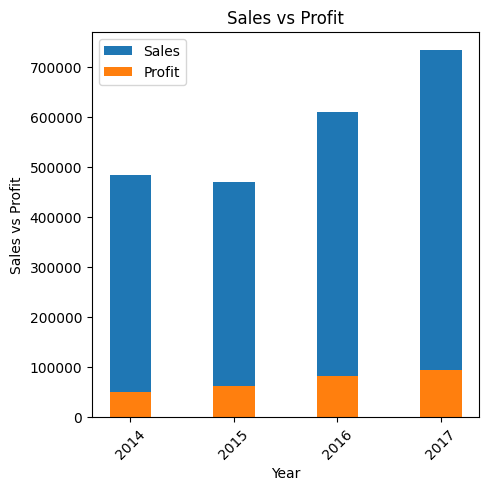

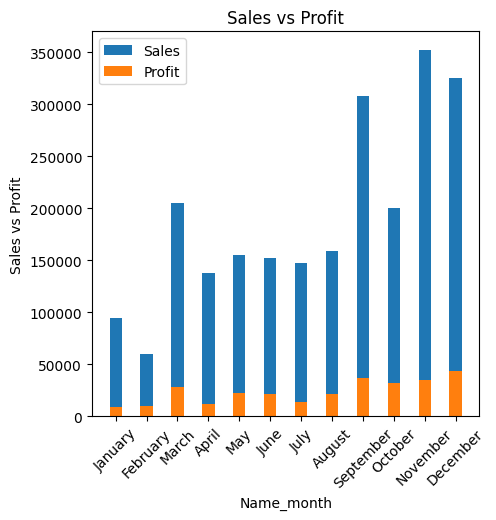

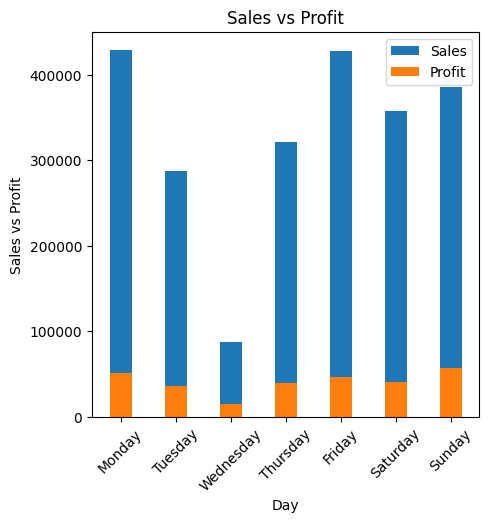

In [8]:
plot_easy_v2(df_year,df,df_year,'Year','Sales','Profit')
plot_easy_v2(df_month,df,df_month,'Name_month','Sales','Profit')
plot_easy_v2(days,df,df_day,'Day','Sales','Profit')

### ¿Cual es la fecha de la venta más grande?

In [9]:
max_sales = df[df['Sales']==df['Sales'].max()]
max_sales.reset_index(drop=True, inplace=True)
print('El producto con la mayor venta es: {}. Una cantidad de {} unidades '
      .format(max_sales.loc[0,'Product Name'],max_sales.loc[0,'Quantity'])) 
print('La fecha es: {}. '.format(max_sales.loc[0,'Order Date'])) 
print('La venta fue de {} y un descuento de {}'.format(max_sales.loc[0,'Sales'],max_sales.loc[0,'Profit'])) 

El producto con la mayor venta es: Cisco TelePresence System EX90 Videoconferencing Unit. Una cantidad de 6 unidades 
La fecha es: 2014-03-18 00:00:00. 
La venta fue de 22638.48 y un descuento de -1811.0784000000021


### Datos acumulados por dias
El siguiente es un analisis de ventas acumuladas por dias

In [10]:
df_acum_days=df.groupby(['Order Date'])["Sales"].sum().reset_index()
print('El día con la mayor cantidad de ganancias es: {}. Las ganancias acumuladas fueron: {} '
      .format(df_acum_days.max()['Order Date'],df_acum_days.max()['Sales']))

El día con la mayor cantidad de ganancias es: 2017-12-30 00:00:00. Las ganancias acumuladas fueron: 28106.716 


### Datos acumulados por semanas
El siguiente es un analisis de ventas acumuladas por semanas

La semana con la mayor cantidad de ganancias es: 12.0 del año 2014.0. Las ganancias acumuladas fueron: 38176.809 


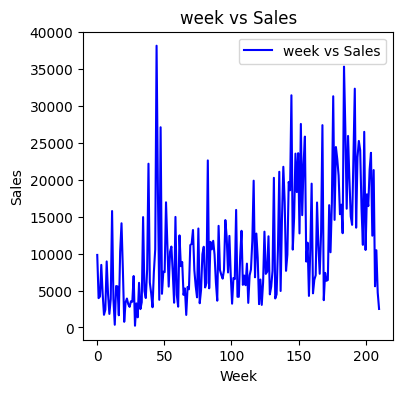

In [11]:
df_week=df.sort_values(by=['Order Date'])
df_week['Week']=[i.isocalendar().week for i in df_week['Order Date']]
df_week=df_week.groupby(['Week','Year'])["Sales"].sum().reset_index()
print('La semana con la mayor cantidad de ganancias es: {} del año {}. Las ganancias acumuladas fueron: {} '
     .format(df_week.sort_values(by=['Sales']).iloc[-1]['Week'],
             df_week.sort_values(by=['Sales']).iloc[-1]['Year'],
             df_week.sort_values(by=['Sales']).iloc[-1]['Sales']))
plt.figure(figsize=[4,4])
plt.plot(np.linspace(0,df_week.shape[0],df_week.shape[0]),
         df_week['Sales'], 'b',label = 'week vs Sales')
plt.xlabel('Week')
plt.ylabel('Sales')
plt.legend()
plt.title('week vs Sales')
plt.show()

### Analisis usando los 5 productos más vendidos

In [12]:
name_product=df['Product Name'].unique()
print('Hay una cantidad de {} productos con identificación diferente'.format(name_product.shape[0]))

Hay una cantidad de 1850 productos con identificación diferente


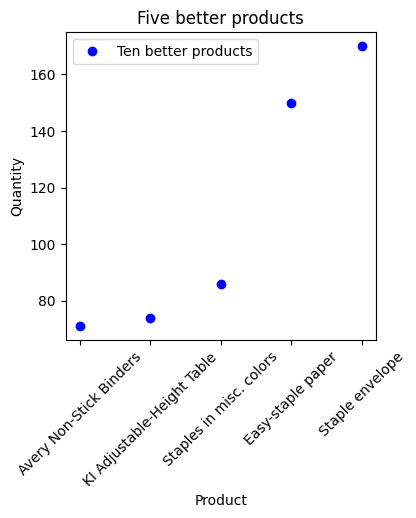

In [13]:
df_product=df.groupby(['Product Name'])['Quantity'].sum().reset_index()
df_product=df_product.sort_values(by=['Quantity'],ascending=True).reset_index()
df_product=df_product[df_product.shape[0]-6:df_product.shape[0]-1]
plt.figure(figsize=[4,4])
plt.plot(df_product['Product Name'],
         df_product['Quantity'], 'bo',label = 'Ten better products')
plt.xticks(rotation=45)
plt.xlabel('Product')
plt.ylabel('Quantity')
plt.legend()
plt.title('Five better products')
plt.show()

### Predicción de las ventas
Realizando un analisis por días todos los meses contienen días sin registro de ventas. En este caso se presentan 1236 registros entre las fechas 2014-01-03 hasta 2017-12-30. Para obtener los datos por día se usó el promedio de las caracteriticas numericas.

In [41]:
df_serie_temp=df[['Order Date','Year','Month','Quantity','Discount','Profit','Sales']]
df_serie_temp=df_serie_temp.sort_values(by=['Order Date'])
df_serie_temp.reset_index(inplace=True, drop=True)
df_serie_temp=df_serie_temp.groupby(['Order Date']).mean().reset_index()
print(df_serie_temp)
print(365*4)

     Order Date    Year  Month  Quantity  Discount      Profit       Sales
0    2014-01-03  2014.0    1.0  2.000000  0.200000    5.551200   16.448000
1    2014-01-04  2014.0    1.0  2.666667  0.400000  -21.996700   96.020000
2    2014-01-05  2014.0    1.0  3.000000  0.200000    4.884000   19.536000
3    2014-01-06  2014.0    1.0  3.333333  0.000000  150.894711  489.677778
4    2014-01-07  2014.0    1.0  5.000000  0.700000  -35.981050   43.579000
...         ...     ...    ...       ...       ...         ...         ...
1232 2017-12-26  2017.0   12.0  3.000000  0.225000   15.280050  203.648500
1233 2017-12-27  2017.0   12.0  3.000000  0.300000  -15.987100   88.818000
1234 2017-12-28  2017.0   12.0  3.368421  0.216842   13.322042   87.228989
1235 2017-12-29  2017.0   12.0  3.416667  0.033333   53.702817  242.961167
1236 2017-12-30  2017.0   12.0  3.285714  0.142857   14.505214  101.970000

[1237 rows x 7 columns]
1460


In [55]:
year = np.array([2014,2015,2016,2017],float)
month = np.linspace(1,12,12)
print(month)
for i in year:
    for j in month:
        df_serie_temp_14 = df_serie_temp[df_serie_temp['Year']==i]
        df_serie_temp_14 = df_serie_temp_14[df_serie_temp_14['Month']==j]
        print(i,j)
        print(df_serie_temp_14.shape[0])


[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12.]
2014.0 1.0
22
2014.0 2.0
20
2014.0 3.0
24
2014.0 4.0
24
2014.0 5.0
28
2014.0 6.0
25
2014.0 7.0
24
2014.0 8.0
24
2014.0 9.0
28
2014.0 10.0
29
2014.0 11.0
29
2014.0 12.0
28
2015.0 1.0
18
2015.0 2.0
17
2015.0 3.0
26
2015.0 4.0
25
2015.0 5.0
27
2015.0 6.0
22
2015.0 7.0
24
2015.0 8.0
22
2015.0 9.0
25
2015.0 10.0
26
2015.0 11.0
28
2015.0 12.0
30
2016.0 1.0
21
2016.0 2.0
24
2016.0 3.0
28
2016.0 4.0
26
2016.0 5.0
29
2016.0 6.0
27
2016.0 7.0
25
2016.0 8.0
28
2016.0 9.0
28
2016.0 10.0
27
2016.0 11.0
29
2016.0 12.0
28
2017.0 1.0
23
2017.0 2.0
20
2017.0 3.0
28
2017.0 4.0
27
2017.0 5.0
27
2017.0 6.0
26
2017.0 7.0
29
2017.0 8.0
27
2017.0 9.0
28
2017.0 10.0
28
2017.0 11.0
30
2017.0 12.0
29
